In [2]:
import math, random
import pandas as pd
pd.set_option('display.max_columns', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox, pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df.drop(['Id'], axis = 1, inplace = True)

In [8]:
# initialize a list of columns to OHE
ohe = []

#initialize another list of columns to drop redundant OHE features
drop_cols = []

In [9]:
sp_mssc_avg = df['SalePrice'].groupby(df['MSSubClass']).mean()

In [10]:
df['SalePrice'].groupby(df['MSZoning']).mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

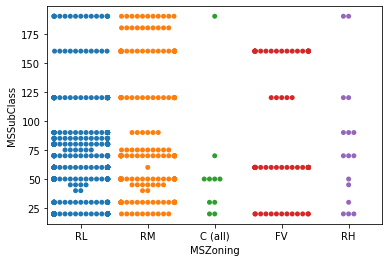

In [11]:
sns.swarmplot(x = 'MSZoning', y = 'MSSubClass', data = df)

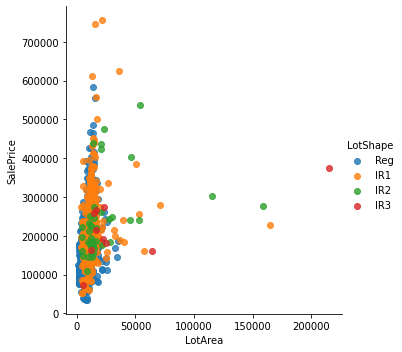

In [12]:
sns.lmplot(x = 'LotArea', y = 'SalePrice', data = df, hue = 'LotShape', fit_reg = False)

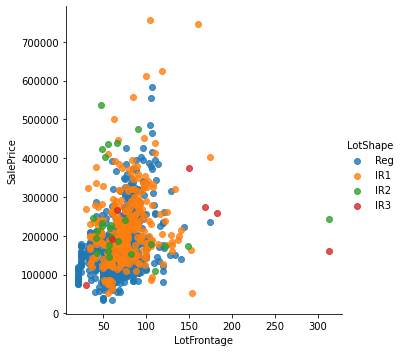

In [13]:
sns.lmplot(x = 'LotFrontage', y = 'SalePrice', data = df, hue = 'LotShape', fit_reg = False)

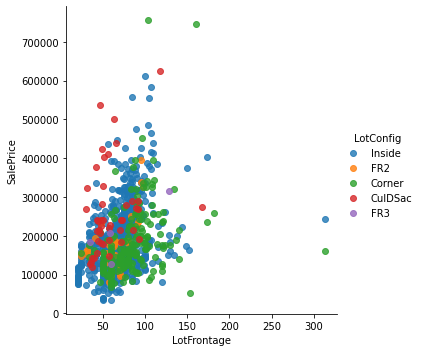

In [14]:
sns.lmplot(x = 'LotFrontage', y = 'SalePrice', data = df, hue = 'LotConfig', fit_reg = False)

In [15]:
df[df['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
31,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1,271,TA,TA,Y,0,65,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350
42,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,840,GasA,Gd,Y,SBrkr,884,0,0,884,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2,504,TA,Gd,Y,240,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000
43,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280,BLQ,491,167,938,GasA,TA,Y,SBrkr,938,0,0,938,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1,308,TA,TA,Y,145,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250
50,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,794,GasA,Gd,Y,SBrkr,794,676,0,1470,0,1,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2,388,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
64,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,

In [16]:
print('Mean LotFrontage : {}'.format(df['LotFrontage'].mean()))
print('Median LotFrontage : {}'.format(df['LotFrontage'].median()))
print('Standard Deviation : {}'.format(df['LotFrontage'].std()))

Mean LotFrontage : 70.04995836802665
Median LotFrontage : 69.0
Standard Deviation : 24.284751774483183


In [17]:
print(df['LotFrontage'].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64


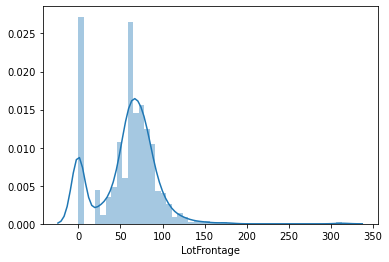

In [18]:
sns.distplot(df['LotFrontage'].fillna(0))

In [19]:
df['LotFrontage'][df['LotFrontage'] > 120].value_counts()

130.0    3
121.0    2
122.0    2
134.0    2
174.0    2
129.0    2
313.0    2
124.0    2
141.0    1
140.0    1
150.0    1
153.0    1
137.0    1
128.0    1
149.0    1
168.0    1
182.0    1
138.0    1
160.0    1
152.0    1
144.0    1
Name: LotFrontage, dtype: int64

In [20]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [21]:
df['SalePrice'].groupby(df['LotConfig']).mean()

LotConfig
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64

In [22]:
df['SalePrice'].groupby(df['LotConfig']).max()

LotConfig
Corner     755000
CulDSac    625000
FR2        394617
FR3        315000
Inside     611657
Name: SalePrice, dtype: int64

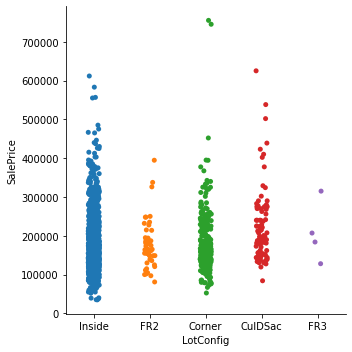

In [23]:
sns.catplot(x = 'LotConfig', y = 'SalePrice', data = df)

In [24]:
ohe.append('LotConfig')

In [25]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [26]:
df['SalePrice'].groupby(df['LotShape']).mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [27]:
df['SalePrice'].groupby(df['LotShape']).max()

LotShape
IR1    755000
IR2    538000
IR3    375000
Reg    582933
Name: SalePrice, dtype: int64

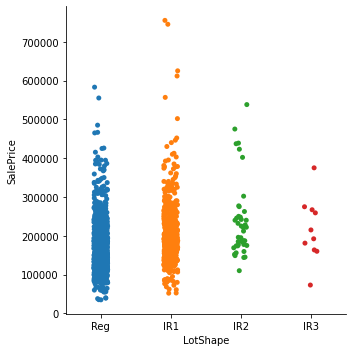

In [28]:
sns.catplot(x = 'LotShape', y = 'SalePrice', data = df)

In [29]:
ohe.append('LotShape')

In [30]:
df['SalePrice'].groupby(df['Street']).mean()

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

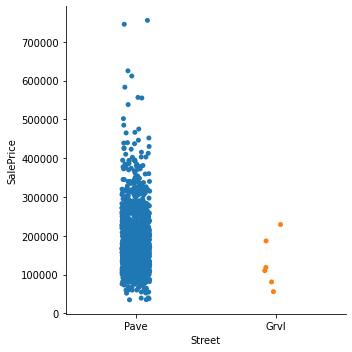

In [31]:
sns.catplot(x = 'Street', y = 'SalePrice', data = df)

In [32]:
ohe.append('Street')
drop_cols.append('Street_Grvl')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
df['Alley'].value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [34]:
df['Alley'].fillna('None', inplace = True)

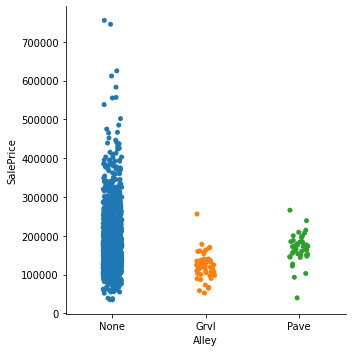

In [35]:
sns.catplot(x = 'Alley', y = 'SalePrice', data = df)

In [36]:
df['SalePrice'].groupby(df['Alley']).mean()

Alley
Grvl    122219.080000
None    183452.131483
Pave    168000.585366
Name: SalePrice, dtype: float64

In [37]:
df['SalePrice'].groupby(df['Alley']).max()

Alley
Grvl    256000
None    755000
Pave    265979
Name: SalePrice, dtype: int64

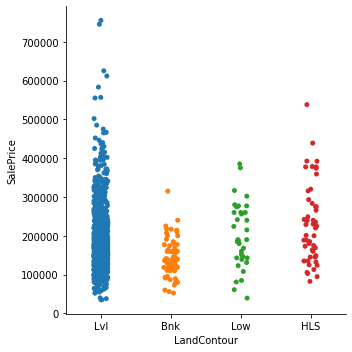

In [38]:
sns.catplot(x = 'LandContour', y = 'SalePrice', data = df)

In [39]:
df['SalePrice'].groupby(df['LandContour']).mean()

LandContour
Bnk    143104.079365
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64

In [40]:
df['SalePrice'].groupby(df['LandContour']).max()

LandContour
Bnk    315000
HLS    538000
Low    385000
Lvl    755000
Name: SalePrice, dtype: int64

In [41]:
df['Utilities'].value_counts(dropna = False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

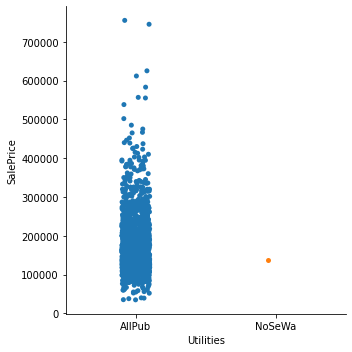

In [42]:
sns.catplot(x = 'Utilities', y = 'SalePrice', data = df)

In [43]:
df['SalePrice'].groupby(df['Utilities']).mean()

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

In [44]:
df['SalePrice'].groupby(df['Utilities']).max()

Utilities
AllPub    755000
NoSeWa    137500
Name: SalePrice, dtype: int64

In [45]:
df_test['Utilities'].value_counts(dropna = False)

AllPub    1457
NaN          2
Name: Utilities, dtype: int64

In [46]:
ohe.append('Utilities')
drop_cols.append('Utilities_NoSeWa')

In [47]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

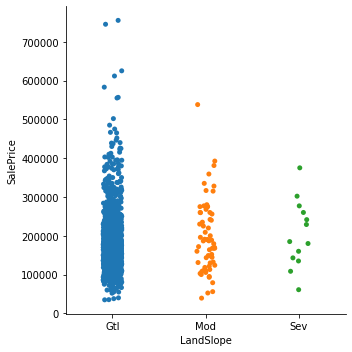

In [48]:
sns.catplot(x = 'LandSlope', y = 'SalePrice', data = df)

In [49]:
df['SalePrice'].groupby(df['LandSlope']).mean()

LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

In [50]:
df['SalePrice'].groupby(df['LandSlope']).max()

LandSlope
Gtl    755000
Mod    538000
Sev    375000
Name: SalePrice, dtype: int64

In [51]:
ohe.append('LandSlope')

In [52]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [53]:
df_test['Neighborhood'].value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [54]:
df['SalePrice'].groupby(df['Neighborhood']).mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [55]:
ohe.append('Neighborhood')

In [56]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

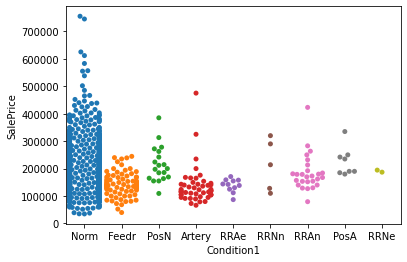

In [57]:
sns.swarmplot(x = 'Condition1', y = 'SalePrice', data = df)

In [58]:
ohe.append('Condition1')

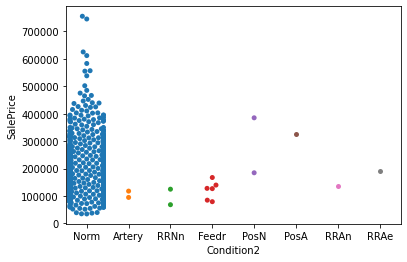

In [59]:
sns.swarmplot(x = 'Condition2', y = 'SalePrice', data = df)

In [60]:
ohe.append('Condition2')

In [61]:
df['SalePrice'].groupby(df['Condition1']).mean()

Condition1
Artery    135091.666667
Feedr     142475.481481
Norm      184495.492063
PosA      225875.000000
PosN      215184.210526
RRAe      138400.000000
RRAn      184396.615385
RRNe      190750.000000
RRNn      212400.000000
Name: SalePrice, dtype: float64

In [62]:
df['SalePrice'].groupby(df['Condition2']).mean()

Condition2
Artery    106500.000000
Feedr     121166.666667
Norm      181169.405536
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
RRAn      136905.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64

In [63]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

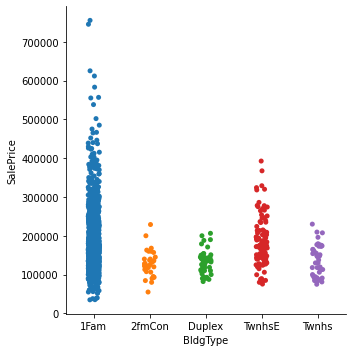

In [64]:
sns.catplot(x = 'BldgType', y = 'SalePrice', data = df)

In [65]:
df['SalePrice'].groupby(df['BldgType']).mean()

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

In [66]:
df['SalePrice'].groupby(df['BldgType']).max()

BldgType
1Fam      755000
2fmCon    228950
Duplex    206300
Twnhs     230000
TwnhsE    392500
Name: SalePrice, dtype: int64

In [67]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

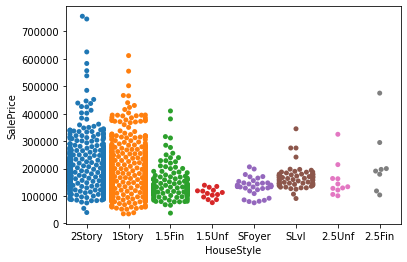

In [68]:
sns.swarmplot(x = 'HouseStyle', y = 'SalePrice', data = df)

In [69]:
df['SalePrice'].groupby(df['HouseStyle']).mean()

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

In [70]:
df['SalePrice'].groupby(df['HouseStyle']).max()

HouseStyle
1.5Fin    410000
1.5Unf    139400
1Story    611657
2.5Fin    475000
2.5Unf    325000
2Story    755000
SFoyer    206300
SLvl      345000
Name: SalePrice, dtype: int64

In [71]:
ohe.append('HouseStyle')

In [72]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [73]:
df['SalePrice'].groupby(df['YearBuilt']).mean()

YearBuilt
1872    122000.000000
1875     94000.000000
1880    200619.750000
1882    168000.000000
1885    111250.000000
1890    142200.000000
1892    291250.000000
1893    325000.000000
1898    106000.000000
1900    112492.600000
1904    157500.000000
1905    163000.000000
1906    135000.000000
1908    183500.000000
1910    111959.058824
1911    130000.000000
1912    119466.666667
1913     90350.000000
1914    126055.285714
1915    134387.500000
1916    139800.000000
1917    129500.000000
1918    172421.428571
1919    154833.333333
1920    112903.333333
1921    140813.333333
1922    109237.500000
1923    159428.571429
1924    105985.714286
1925    129190.625000
            ...      
1981    249880.000000
1982    132400.000000
1983    181400.000000
1984    164111.111111
1985    191400.000000
1986    212000.000000
1987    198000.000000
1988    204636.363636
1989    279500.000000
1990    220881.666667
1991    186140.000000
1992    218384.615385
1993    218058.823529
1994    247900.000000


In [74]:
ohe.append('YearBuilt')

In [75]:
df['Remod_gap'] = df['YearRemodAdd'] - df['YearBuilt']

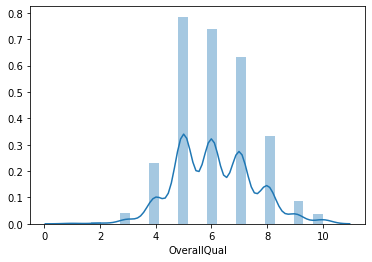

In [76]:
sns.distplot(df['OverallQual'])

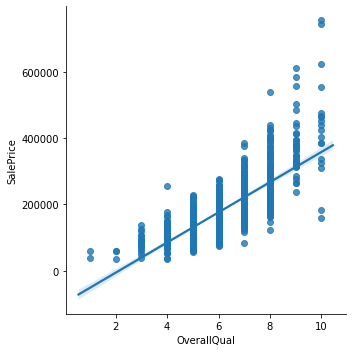

In [77]:
sns.lmplot(x = 'OverallQual', y = 'SalePrice', data = df)

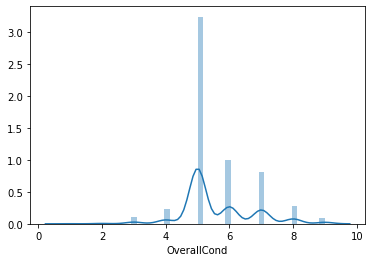

In [78]:
sns.distplot(df['OverallCond'])

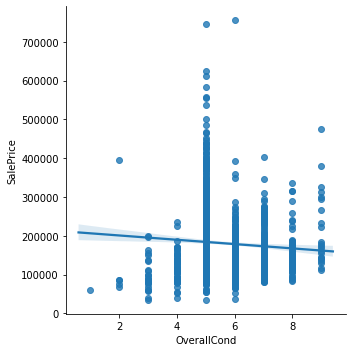

In [79]:
sns.lmplot(x = 'OverallCond', y = 'SalePrice', data = df)

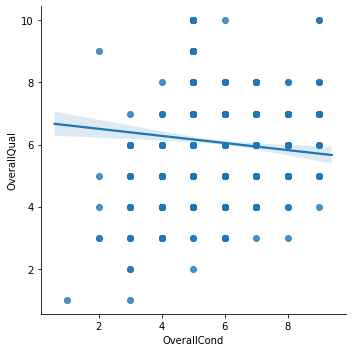

In [80]:
sns.lmplot(x = 'OverallCond', y = 'OverallQual', data = df)

In [81]:
df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

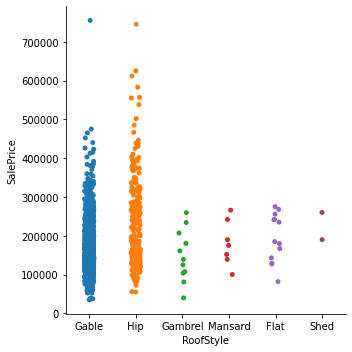

In [82]:
sns.catplot(x = 'RoofStyle', y = 'SalePrice', data = df)

In [83]:
df['SalePrice'].groupby(df['RoofStyle']).mean()

RoofStyle
Flat       194690.000000
Gable      171483.956179
Gambrel    148909.090909
Hip        218876.933566
Mansard    180568.428571
Shed       225000.000000
Name: SalePrice, dtype: float64

In [84]:
df['SalePrice'].groupby(df['RoofStyle']).max()

RoofStyle
Flat       274970
Gable      755000
Gambrel    259500
Hip        745000
Mansard    265979
Shed       260000
Name: SalePrice, dtype: int64

In [85]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [86]:
df_test['RoofMatl'].value_counts()

CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64

In [87]:
df.drop(df[df['RoofMatl'] == 'Roll'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Membran'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Metal'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'ClyTile'].index, inplace = True)

In [88]:
df.shape

(1456, 81)

In [89]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Name: RoofMatl, dtype: int64

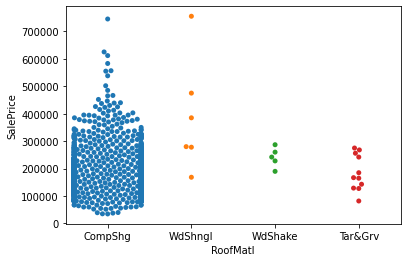

In [90]:
sns.swarmplot(x = 'RoofMatl', y = 'SalePrice', data = df)

In [91]:
df['SalePrice'].groupby(df['RoofMatl']).mean()

RoofMatl
CompShg    179803.679219
Tar&Grv    185406.363636
WdShake    241400.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64

In [92]:
df['SalePrice'].groupby(df['RoofMatl']).max()

RoofMatl
CompShg    745000
Tar&Grv    274970
WdShake    287000
WdShngl    755000
Name: SalePrice, dtype: int64

In [93]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    106
CemntBd     61
BrkFace     50
WdShing     26
Stucco      24
AsbShng     19
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [94]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    140
CmentBd     60
Wd Shng     38
Stucco      25
BrkFace     25
AsbShng     19
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [95]:
df_test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [96]:
df_test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [97]:
df.drop(df[df['Exterior2nd'] == 'Other'].index, inplace = True)

In [98]:
df.shape

(1455, 81)

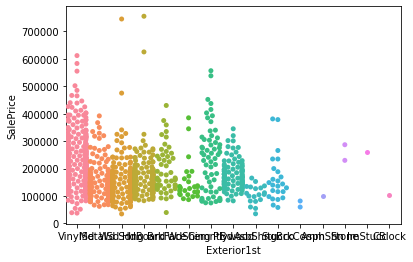

In [99]:
sns.swarmplot(x = 'Exterior1st', y = 'SalePrice', data = df)

In [100]:
df['SalePrice'].groupby(df['Exterior1st']).mean()

Exterior1st
AsbShng    105826.894737
AsphShn    100000.000000
BrkComm     71000.000000
BrkFace    194573.000000
CBlock     105000.000000
CemntBd    231690.655738
HdBoard    163077.450450
ImStucc    262000.000000
MetalSd    149422.177273
Plywood    175285.632075
Stone      258500.000000
Stucco     163114.583333
VinylSd    213528.101167
Wd Sdng    149841.645631
WdShing    150655.076923
Name: SalePrice, dtype: float64

In [101]:
df['SalePrice'].groupby(df['Exterior1st']).max()

Exterior1st
AsbShng    165500
AsphShn    100000
BrkComm     82000
BrkFace    430000
CBlock     105000
CemntBd    556581
HdBoard    755000
ImStucc    262000
MetalSd    392000
Plywood    345000
Stone      287000
Stucco     381000
VinylSd    611657
Wd Sdng    745000
WdShing    385000
Name: SalePrice, dtype: int64

In [102]:
df['SalePrice'].groupby(df['Exterior2nd']).mean()

Exterior2nd
AsbShng    112853.210526
AsphShn    138000.000000
Brk Cmn    126714.285714
BrkFace    195818.000000
CBlock     105000.000000
CmentBd    230093.833333
HdBoard    167661.565217
ImStucc    252070.000000
MetalSd    149803.172897
Plywood    167503.278571
Stone      158224.800000
Stucco     155741.360000
VinylSd    214432.460317
Wd Sdng    148386.065990
Wd Shng    161328.947368
Name: SalePrice, dtype: float64

In [103]:
df['SalePrice'].groupby(df['Exterior2nd']).max()

Exterior2nd
AsbShng    225000
AsphShn    175000
Brk Cmn    155000
BrkFace    430000
CBlock     105000
CmentBd    556581
HdBoard    755000
ImStucc    745000
MetalSd    392000
Plywood    320000
Stone      230000
Stucco     381000
VinylSd    611657
Wd Sdng    475000
Wd Shng    538000
Name: SalePrice, dtype: int64

In [104]:
ohe.append('Exterior1st')
ohe.append('Exterior2nd')

In [105]:
df['MasVnrType'].value_counts(dropna = False)

None       862
BrkFace    444
Stone      126
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [106]:
df_test['MasVnrType'].value_counts(dropna = False)

None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [107]:
df['MasVnrType'].fillna('No', inplace = True)
df_test['MasVnrType'].fillna('No', inplace = True)

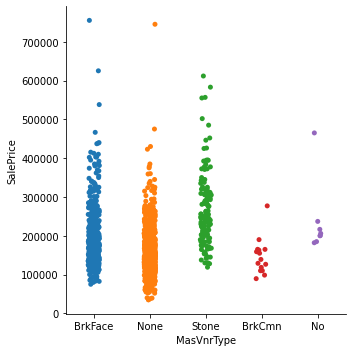

In [108]:
sns.catplot(x = 'MasVnrType', y = 'SalePrice', data = df)

In [109]:
df['SalePrice'].groupby(df['MasVnrType']).mean()

MasVnrType
BrkCmn     146318.066667
BrkFace    204434.421171
No         236484.250000
None       156095.375870
Stone      267442.095238
Name: SalePrice, dtype: float64

In [110]:
df['SalePrice'].groupby(df['MasVnrType']).max()

MasVnrType
BrkCmn     277000
BrkFace    755000
No         465000
None       745000
Stone      611657
Name: SalePrice, dtype: int64

In [111]:
ohe.append('MasVnrType')

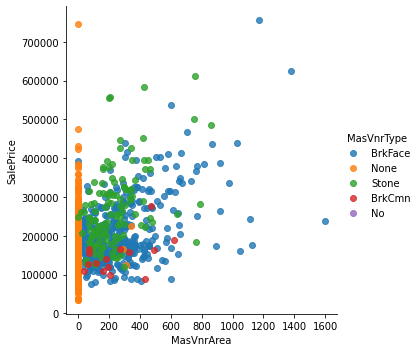

In [112]:
sns.lmplot(x = 'MasVnrArea', y = 'SalePrice', hue = 'MasVnrType', data = df, fit_reg = False)

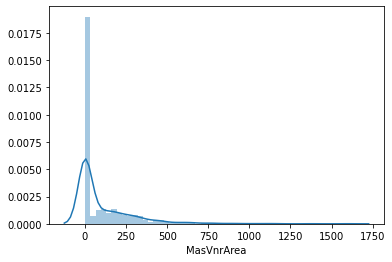

In [113]:
sns.distplot(df['MasVnrArea'][df['MasVnrArea'].notna()])

In [114]:
df['ExterQual'].value_counts()

TA    903
Gd    487
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [115]:
df_test['ExterQual'].value_counts()

TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64

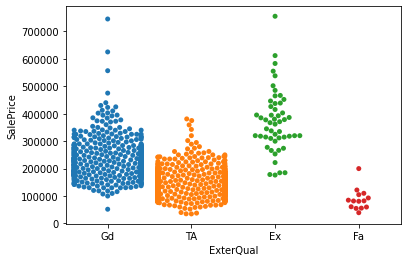

In [116]:
sns.swarmplot(x = 'ExterQual', y = 'SalePrice', data = df)

In [117]:
df['SalePrice'].groupby(df['ExterQual']).mean()

ExterQual
Ex    371426.862745
Fa     87985.214286
Gd    231454.112936
TA    144202.358804
Name: SalePrice, dtype: float64

In [118]:
df['SalePrice'].groupby(df['ExterQual']).max()

ExterQual
Ex    755000
Fa    200000
Gd    745000
TA    381000
Name: SalePrice, dtype: int64

In [119]:
df['ExterCond'].value_counts()

TA    1277
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [120]:
df_test['ExterCond'].value_counts()

TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64

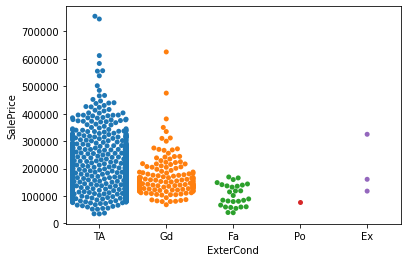

In [121]:
sns.swarmplot(x = 'ExterCond', y = 'SalePrice', data = df)

In [122]:
df['SalePrice'].groupby(df['ExterCond']).mean()

ExterCond
Ex    201333.333333
Fa    102595.142857
Gd    168897.568493
Po     76500.000000
TA    183943.020360
Name: SalePrice, dtype: float64

In [123]:
df['SalePrice'].groupby(df['ExterCond']).max()

ExterCond
Ex    325000
Fa    169500
Gd    625000
Po     76500
TA    755000
Name: SalePrice, dtype: int64

In [124]:
df['Foundation'].value_counts()

PConc     645
CBlock    631
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [125]:
df_test['Foundation'].value_counts()

PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64

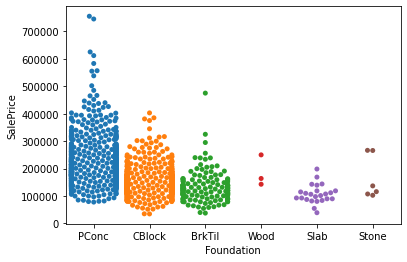

In [126]:
sns.swarmplot(x = 'Foundation', y = 'SalePrice', data = df)

In [127]:
df['SalePrice'].groupby(df['Foundation']).mean()

Foundation
BrkTil    132291.075342
CBlock    149632.841521
PConc     225186.195349
Slab      107365.625000
Stone     165959.166667
Wood      185666.666667
Name: SalePrice, dtype: float64

In [128]:
df['SalePrice'].groupby(df['Foundation']).max()

Foundation
BrkTil    475000
CBlock    402861
PConc     755000
Slab      198500
Stone     266500
Wood      250000
Name: SalePrice, dtype: int64

In [129]:
ohe.append('Foundation')

In [130]:
df['BsmtQual'].value_counts(dropna = False)

TA     647
Gd     616
Ex     120
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [131]:
df_test['BsmtQual'].value_counts(dropna = False)

TA     634
Gd     591
Ex     137
Fa      53
NaN     44
Name: BsmtQual, dtype: int64

In [132]:
df['BsmtQual'].fillna('None', inplace = True)

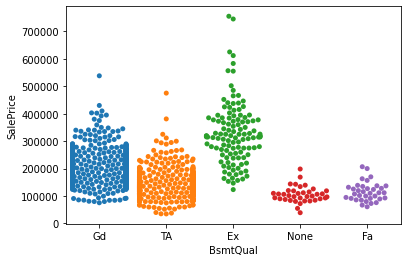

In [133]:
sns.swarmplot(x = 'BsmtQual', y = 'SalePrice', data = df)

In [134]:
df['SalePrice'].groupby(df['BsmtQual']).mean()

BsmtQual
Ex      328433.050000
Fa      115692.028571
Gd      202436.655844
None    105652.891892
TA      140704.979907
Name: SalePrice, dtype: float64

In [135]:
df['SalePrice'].groupby(df['BsmtQual']).max()

BsmtQual
Ex      755000
Fa      206900
Gd      538000
None    198500
TA      475000
Name: SalePrice, dtype: int64

In [136]:
df['BsmtCond'].value_counts(dropna = False)

TA     1306
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [137]:
df_test['BsmtCond'].value_counts(dropna = False)

TA     1295
Fa       59
Gd       57
NaN      45
Po        3
Name: BsmtCond, dtype: int64

In [138]:
df['BsmtCond'].fillna('None', inplace = True)
df_test['BsmtCond'].fillna('None', inplace = True)

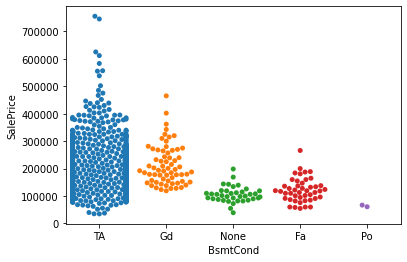

In [139]:
sns.swarmplot(x = 'BsmtCond', y = 'SalePrice', data = df)

In [140]:
df['SalePrice'].groupby(df['BsmtCond']).mean()

BsmtCond
Fa      121809.533333
Gd      213599.907692
None    105652.891892
Po       64000.000000
TA      183541.245023
Name: SalePrice, dtype: float64

In [141]:
df['SalePrice'].groupby(df['BsmtCond']).max()

BsmtCond
Fa      265979
Gd      465000
None    198500
Po       67000
TA      755000
Name: SalePrice, dtype: int64

In [142]:
ohe.append('BsmtCond')

In [143]:
df['BsmtExposure'].value_counts(dropna = False)

No     952
Av     221
Gd     130
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [144]:
df_test['BsmtExposure'].value_counts(dropna = False)

No     951
Av     197
Gd     142
Mn     125
NaN     44
Name: BsmtExposure, dtype: int64

In [145]:
df['BsmtExposure'].fillna('None', inplace = True)

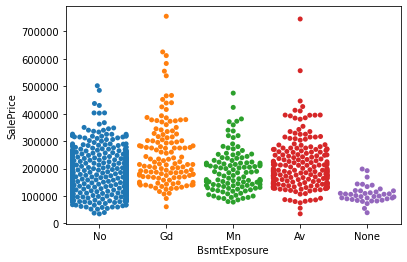

In [146]:
sns.swarmplot(x = 'BsmtExposure', y = 'SalePrice', data = df)

In [147]:
df['SalePrice'].groupby(df['BsmtExposure']).mean()

BsmtExposure
Av      206643.420814
Gd      258691.800000
Mn      192789.657895
No      165682.392857
None    107938.342105
Name: SalePrice, dtype: float64

In [148]:
df['SalePrice'].groupby(df['BsmtExposure']).max()

BsmtExposure
Av      745000
Gd      755000
Mn      475000
No      501837
None    198500
Name: SalePrice, dtype: int64

In [149]:
df['BsmtFinType1'].value_counts(dropna = False)

Unf    430
GLQ    416
ALQ    219
BLQ    148
Rec    132
LwQ     73
NaN     37
Name: BsmtFinType1, dtype: int64

In [150]:
df_test['BsmtFinType1'].value_counts(dropna = False)

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64

In [151]:
df['BsmtFinType2'].value_counts(dropna = False)

Unf    1252
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      13
Name: BsmtFinType2, dtype: int64

In [152]:
df_test['BsmtFinType2'].value_counts(dropna = False)

Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [153]:
df['BsmtFinType1'].fillna('None', inplace = True)
df['BsmtFinType2'].fillna('None', inplace = True)

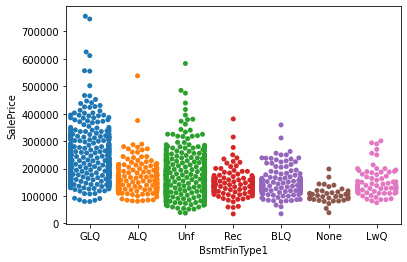

In [154]:
sns.swarmplot(x = 'BsmtFinType1', y = 'SalePrice', data = df)

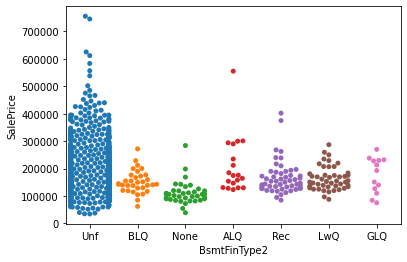

In [155]:
sns.swarmplot(x = 'BsmtFinType2', y = 'SalePrice', data = df)

In [156]:
df['SalePrice'].groupby(df['BsmtFinType1']).mean()

BsmtFinType1
ALQ     161488.926941
BLQ     149493.655405
GLQ     235394.074519
LwQ     150624.657534
None    105652.891892
Rec     146964.166667
Unf     170670.576744
Name: SalePrice, dtype: float64

In [157]:
df['SalePrice'].groupby(df['BsmtFinType1']).max()

BsmtFinType1
ALQ     538000
BLQ     359100
GLQ     755000
LwQ     301000
None    198500
Rec     381000
Unf     582933
Name: SalePrice, dtype: int64

In [158]:
df['SalePrice'].groupby(df['BsmtFinType2']).mean()

BsmtFinType2
ALQ     209942.105263
BLQ     151101.000000
GLQ     176326.923077
LwQ     164364.130435
None    110346.236842
Rec     164917.129630
Unf     184648.986422
Name: SalePrice, dtype: float64

In [159]:
df['SalePrice'].groupby(df['BsmtFinType2']).max()

BsmtFinType2
ALQ     555000
BLQ     271900
GLQ     270000
LwQ     287000
None    284000
Rec     402000
Unf     755000
Name: SalePrice, dtype: int64

In [160]:
ohe.append('BsmtFinType2')

In [161]:
df['Heating'].value_counts(dropna = False)

GasA     1423
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

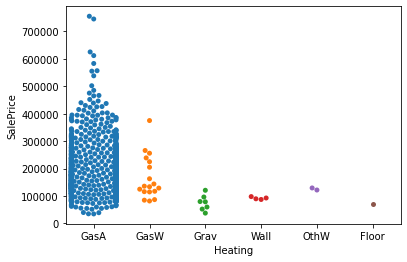

In [162]:
sns.swarmplot(x = 'Heating', y = 'SalePrice', data = df)

In [163]:
df['SalePrice'].groupby(df['Heating']).mean()

Heating
Floor     72500.000000
GasA     181931.670415
GasW     166632.166667
Grav      75271.428571
OthW     125750.000000
Wall      92100.000000
Name: SalePrice, dtype: float64

In [164]:
df['SalePrice'].groupby(df['Heating']).max()

Heating
Floor     72500
GasA     755000
GasW     375000
Grav     121000
OthW     129500
Wall      98000
Name: SalePrice, dtype: int64

In [165]:
df['HeatingQC'].value_counts(dropna = False)

Ex    737
TA    428
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64

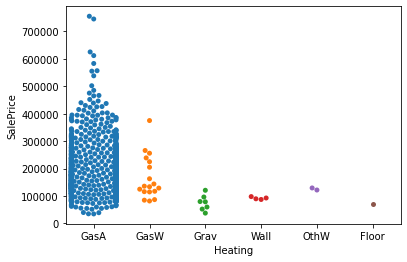

In [166]:
sns.swarmplot(x = 'Heating', y = 'SalePrice', data = df)

In [167]:
df['SalePrice'].groupby(df['HeatingQC']).mean()

HeatingQC
Ex    214859.012212
Fa    123919.489796
Gd    156941.616667
Po     87000.000000
TA    142362.876168
Name: SalePrice, dtype: float64

In [168]:
df['SalePrice'].groupby(df['HeatingQC']).max()

HeatingQC
Ex    755000
Fa    235000
Gd    395000
Po     87000
TA    375000
Name: SalePrice, dtype: int64

In [169]:
df['CentralAir'].value_counts()

Y    1360
N      95
Name: CentralAir, dtype: int64

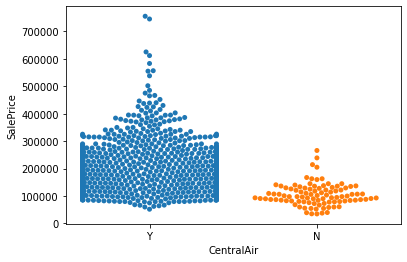

In [170]:
sns.swarmplot(x = 'CentralAir', y = 'SalePrice', data = df)

In [171]:
df['SalePrice'].groupby(df['CentralAir']).mean()

CentralAir
N    105264.073684
Y    186108.352206
Name: SalePrice, dtype: float64

In [172]:
df['SalePrice'].groupby(df['CentralAir']).max()

CentralAir
N    265979
Y    755000
Name: SalePrice, dtype: int64

In [173]:
ohe.append('CentralAir')
drop_cols.append('CentralAir_N')

In [174]:
df['Electrical'].value_counts(dropna = False)

SBrkr    1330
FuseA      93
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [175]:
df[df['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remod_gap
1379,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500,1


In [176]:
df[['MSSubClass','Electrical']][df['MSSubClass'] == 80]

,MSSubClass,Electrical
54,80,SBrkr
84,80,SBrkr
111,80,SBrkr
186,80,SBrkr
253,80,SBrkr
260,80,SBrkr
262,80,SBrkr
295,80,SBrkr
319,80,SBrkr
324,80,SBrkr


In [177]:
df['Electrical'].fillna('SBrkr', inplace = True)

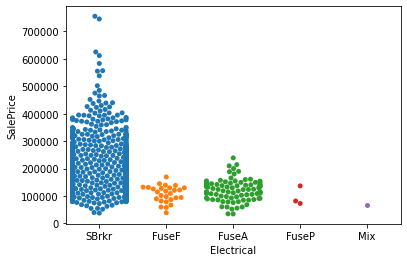

In [178]:
sns.swarmplot(x = 'Electrical', y = 'SalePrice', data = df)

In [179]:
df['SalePrice'].groupby(df['Electrical']).mean()

Electrical
FuseA    122037.720430
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186695.492863
Name: SalePrice, dtype: float64

In [180]:
df['SalePrice'].groupby(df['Electrical']).max()

Electrical
FuseA    239000
FuseF    169500
FuseP    137000
Mix       67000
SBrkr    755000
Name: SalePrice, dtype: int64

In [181]:
df['KitchenQual'].value_counts()

TA    732
Gd    585
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

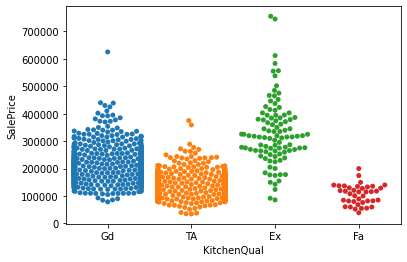

In [182]:
sns.swarmplot(x = 'KitchenQual', y = 'SalePrice', data = df)

In [183]:
df['SalePrice'].groupby(df['KitchenQual']).mean()

KitchenQual
Ex    330257.242424
Fa    105565.205128
Gd    211933.316239
TA    139773.150273
Name: SalePrice, dtype: float64

In [184]:
df['SalePrice'].groupby(df['KitchenQual']).max()

KitchenQual
Ex    755000
Fa    200000
Gd    625000
TA    375000
Name: SalePrice, dtype: int64

In [185]:
df['Functional'].value_counts(dropna = False)

Typ     1356
Min2      34
Min1      31
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [186]:
df_test['Functional'].value_counts(dropna = False)

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
NaN        2
Sev        1
Name: Functional, dtype: int64

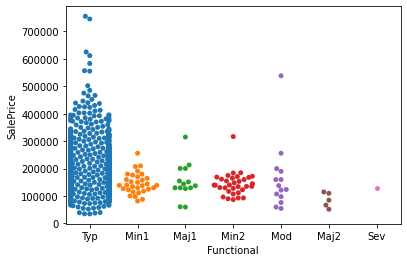

In [187]:
sns.swarmplot(x = 'Functional', y = 'SalePrice', data = df)

In [188]:
df['SalePrice'].groupby(df['Functional']).mean()

Functional
Maj1    153948.142857
Maj2     85800.000000
Min1    146385.483871
Min2    144240.647059
Mod     163171.428571
Sev     129000.000000
Typ     183383.215339
Name: SalePrice, dtype: float64

In [189]:
df['SalePrice'].groupby(df['Functional']).max()

Functional
Maj1    315000
Maj2    115000
Min1    256000
Min2    316600
Mod     538000
Sev     129000
Typ     755000
Name: SalePrice, dtype: int64

In [190]:
df['FireplaceQu'].value_counts(dropna = False)

NaN    689
Gd     379
TA     310
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [191]:
df_test['FireplaceQu'].value_counts(dropna = False)

NaN    730
Gd     364
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64

In [192]:
df['FireplaceQu'].fillna('None', inplace = True)
df_test['FireplaceQu'].fillna('None', inplace = True)

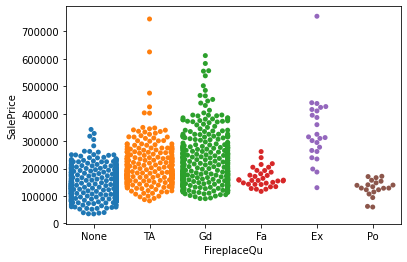

In [193]:
sns.swarmplot(x = 'FireplaceQu', y = 'SalePrice', data = df)

In [194]:
df['SalePrice'].groupby(df['FireplaceQu']).mean()

FireplaceQu
Ex      337712.500000
Fa      167298.484848
Gd      226526.485488
None    141337.769231
Po      129764.150000
TA      205325.651613
Name: SalePrice, dtype: float64

In [195]:
df['SalePrice'].groupby(df['FireplaceQu']).max()

FireplaceQu
Ex      755000
Fa      262000
Gd      611657
None    342643
Po      172000
TA      745000
Name: SalePrice, dtype: int64

In [196]:
df['GarageType'].value_counts(dropna = False)

Attchd     866
Detchd     386
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [197]:
df_test['GarageType'].value_counts(dropna = False)

Attchd     853
Detchd     392
BuiltIn     98
NaN         76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [198]:
df['GarageType'].fillna('None', inplace = True)
df_test['GarageType'].fillna('None', inplace = True)

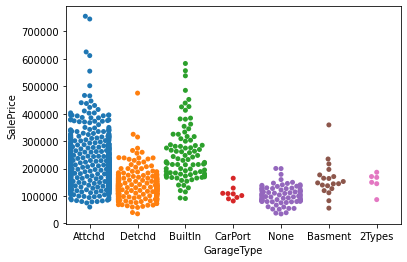

In [199]:
sns.swarmplot(x = 'GarageType', y = 'SalePrice', data = df)

In [200]:
df['SalePrice'].groupby(df['GarageType']).mean()

GarageType
2Types     151283.333333
Attchd     202789.966513
Basment    160570.684211
BuiltIn    254751.738636
CarPort    109962.111111
Detchd     134083.626943
None       103317.283951
Name: SalePrice, dtype: float64

In [201]:
df['SalePrice'].groupby(df['GarageType']).max()

GarageType
2Types     186700
Attchd     755000
Basment    359100
BuiltIn    582933
CarPort    164900
Detchd     475000
None       200500
Name: SalePrice, dtype: int64

In [202]:
df['GarageFinish'].value_counts(dropna = False)

Unf    602
RFn    422
Fin    350
NaN     81
Name: GarageFinish, dtype: int64

In [203]:
df_test['GarageFinish'].value_counts(dropna = False)

Unf    625
RFn    389
Fin    367
NaN     78
Name: GarageFinish, dtype: int64

In [204]:
df['GarageFinish'].fillna('None', inplace = True)
df_test['GarageFinish'].fillna('None', inplace = True)

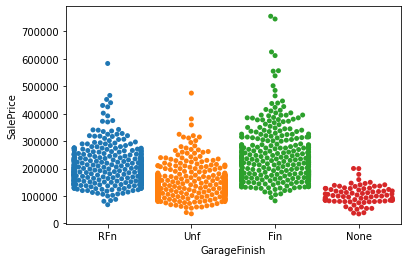

In [205]:
sns.swarmplot(x = 'GarageFinish', y = 'SalePrice', data = df)

In [206]:
df['SalePrice'].groupby(df['GarageFinish']).mean()

GarageFinish
Fin     240055.848571
None    103317.283951
RFn     202068.869668
Unf     141937.102990
Name: SalePrice, dtype: float64

In [207]:
df['SalePrice'].groupby(df['GarageFinish']).max()

GarageFinish
Fin     755000
None    200500
RFn     582933
Unf     475000
Name: SalePrice, dtype: int64

In [208]:
df['GarageQual'].value_counts(dropna = False)

TA     1306
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [209]:
df_test['GarageQual'].value_counts(dropna = False)

TA     1293
NaN      78
Fa       76
Gd       10
Po        2
Name: GarageQual, dtype: int64

In [210]:
df['GarageQual'].fillna('None', inplace = True)
df_test['GarageQual'].fillna('None', inplace = True)

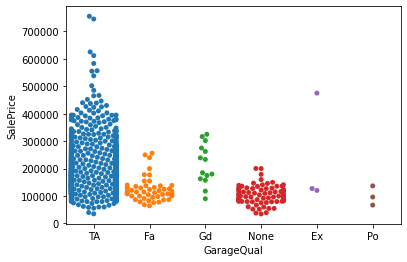

In [211]:
sns.swarmplot(x = 'GarageQual', y = 'SalePrice', data = df)

In [212]:
df['SalePrice'].groupby(df['GarageQual']).mean()

GarageQual
Ex      241000.000000
Fa      123573.354167
Gd      215860.714286
None    103317.283951
Po      100166.666667
TA      187413.227412
Name: SalePrice, dtype: float64

In [213]:
df['SalePrice'].groupby(df['GarageQual']).max()

GarageQual
Ex      475000
Fa      256000
Gd      325000
None    200500
Po      137000
TA      755000
Name: SalePrice, dtype: int64

In [214]:
df['GarageCond'].value_counts(dropna = False)

TA     1322
NaN      81
Fa       34
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [215]:
df_test['GarageCond'].value_counts(dropna = False)

TA     1328
NaN      78
Fa       39
Po        7
Gd        6
Ex        1
Name: GarageCond, dtype: int64

In [216]:
df['GarageCond'].fillna('None', inplace = True)
df_test['GarageCond'].fillna('None', inplace = True)

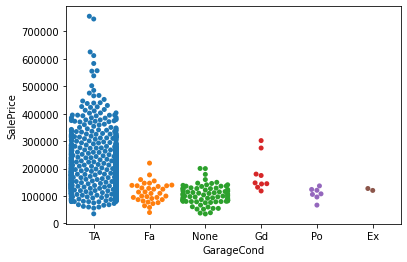

In [217]:
sns.swarmplot(x = 'GarageCond', y = 'SalePrice', data = df)

In [218]:
df['SalePrice'].groupby(df['GarageCond']).mean()

GarageCond
Ex      124000.000000
Fa      113996.794118
Gd      179930.000000
None    103317.283951
Po      108500.000000
TA      187773.059758
Name: SalePrice, dtype: float64

In [219]:
df['SalePrice'].groupby(df['GarageCond']).max()

GarageCond
Ex      127500
Fa      220000
Gd      302000
None    200500
Po      137000
TA      755000
Name: SalePrice, dtype: int64

In [220]:
df['PavedDrive'].value_counts(dropna = False)

Y    1335
N      90
P      30
Name: PavedDrive, dtype: int64

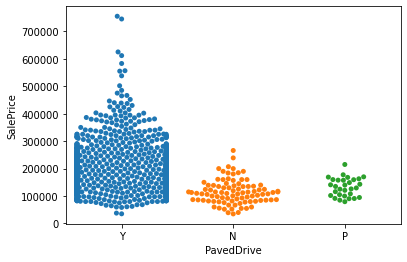

In [221]:
sns.swarmplot(x = 'PavedDrive', y = 'SalePrice', data = df)

In [222]:
df['SalePrice'].groupby(df['PavedDrive']).mean()

PavedDrive
N    115039.122222
P    132330.000000
Y    186355.074906
Name: SalePrice, dtype: float64

In [223]:
df['SalePrice'].groupby(df['PavedDrive']).max()

PavedDrive
N    265979
P    215000
Y    755000
Name: SalePrice, dtype: int64

In [224]:
df['PoolQC'].value_counts(dropna = False)

NaN    1449
Fa        2
Ex        2
Gd        2
Name: PoolQC, dtype: int64

In [225]:
df_test['PoolQC'].value_counts(dropna = False)

NaN    1456
Ex        2
Gd        1
Name: PoolQC, dtype: int64

In [226]:
df['PoolQC'].fillna('None', inplace = True)
df_test['PoolQC'].fillna('None', inplace = True)

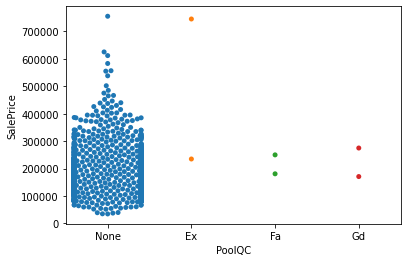

In [227]:
sns.swarmplot(x = 'PoolQC', y = 'SalePrice', data = df)

In [228]:
ohe.append('PoolQC')

In [229]:
df['Fence'].value_counts(dropna = False)

NaN      1174
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [230]:
df_test['Fence'].value_counts(dropna = False)

NaN      1169
MnPrv     172
GdPrv      59
GdWo       58
MnWw        1
Name: Fence, dtype: int64

In [231]:
df['Fence'].fillna('None', inplace = True)
df_test['Fence'].fillna('None', inplace = True)

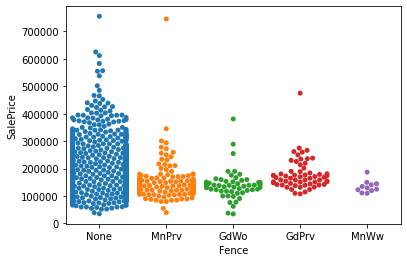

In [232]:
sns.swarmplot(x = 'Fence', y = 'SalePrice', data = df)

In [233]:
df['SalePrice'].groupby(df['Fence']).mean()

Fence
GdPrv    178927.457627
GdWo     140379.314815
MnPrv    148751.089172
MnWw     134286.363636
None     187512.071550
Name: SalePrice, dtype: float64

In [234]:
df['SalePrice'].groupby(df['Fence']).max()

Fence
GdPrv    475000
GdWo     381000
MnPrv    745000
MnWw     187000
None     755000
Name: SalePrice, dtype: int64

In [235]:
ohe.append('Fence')
ohe.append('SaleType')
ohe.append('SaleCondition')

In [236]:
df['SaleCondition'].value_counts(dropna = False)

Normal     1195
Partial     123
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [237]:
df['MiscFeature'].value_counts(dropna = False)

NaN     1401
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [238]:
df.drop(df[df['MiscFeature'] == 'TenC'].index, inplace = True)

In [239]:
df.shape

(1454, 81)

In [240]:
df['MiscFeature'].value_counts(dropna = False)

NaN     1401
Shed      49
Gar2       2
Othr       2
Name: MiscFeature, dtype: int64

In [241]:
df_test['MiscFeature'].value_counts(dropna = False)

NaN     1408
Shed      46
Gar2       3
Othr       2
Name: MiscFeature, dtype: int64

In [242]:
df['MiscFeature'].fillna('None', inplace = True)
df_test['MiscFeature'].fillna('None', inplace = True)

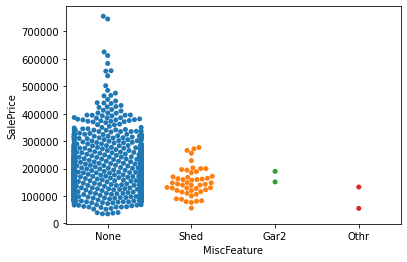

In [243]:
sns.swarmplot(x = 'MiscFeature', y = 'SalePrice', data = df)

In [244]:
df['SalePrice'].groupby(df['MiscFeature']).mean()

MiscFeature
Gar2    170750.000000
None    181955.569593
Othr     94000.000000
Shed    151187.612245
Name: SalePrice, dtype: float64

In [245]:
df['SalePrice'].groupby(df['MiscFeature']).max()

MiscFeature
Gar2    190000
None    755000
Othr    133000
Shed    277000
Name: SalePrice, dtype: int64

In [246]:
ohe.append('MiscFeature')

In [247]:
# RoofStyle can be retested for OHE
replace_dict = {
    'MSZoning': {'FV': 4, 'RL': 3, 'RH': 2, 'RM': 1, 'C (all)': 0},
    'Alley': {'None': 2, 'Pave': 1, 'Grvl': 0},
    'LandContour': {'Lvl': 3, 'HLS': 2, 'Low': 1, 'Bnk': 0},
    'BldgType': {'1Fam': 4, 'TwnhsE': 3, 'Twnhs': 2, 'Duplex': 1, '2fmCon': 0},
    'RoofStyle': {'Hip': 5, 'Gable': 4, 'Flat': 3, 'Mansard': 2, 'Shed': 1, 'Gambrel': 0},
    'RoofMatl': {'WdShngl': 3, 'CompShg': 2, 'WdShake': 1, 'Tar&Grv': 0},
#     'MasVnrType': {'BrkFace': 4, 'Stone': 3, 'No': 2, 'None': 1, 'BrkCmn': 0},
    'ExterQual': {'Ex': 3, 'Gd': 2, 'Fa': 1, 'TA': 0},
    'ExterCond': {'Ex': 4, 'TA': 3, 'Gd': 2, 'Fa': 1, 'Po': 0},
    'BsmtQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'BsmtFinType1': {'GLQ': 6, 'Unf': 5, 'ALQ': 4, 'BLQ': 3, 'LwQ': 2, 'Rec': 1, 'None': 0},
    'Heating': {'GasA': 5, 'GasW': 4, 'OthW': 3, 'Wall': 2, 'Grav': 1, 'Floor': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'Electrical': {'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0},
    'KitchenQual': {'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0},
    'Functional': {'Typ': 6, 'Mod': 5, 'Maj1': 4, 'Min1': 3, 'Min2': 2, 'Maj2': 1, 'Sev': 0},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, 'Po': 0},
    'GarageType': {'Attchd': 6, 'BuiltIn': 5, 'Basment': 4, '2Types': 3, 'Detchd': 2, 'None': 1, 'CarPort': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, 'Po': 0},
    'GarageCond': {'TA': 5, 'Gd': 4, 'Ex': 3, 'Fa': 2, 'None': 1, 'Po': 0},
    'PavedDrive': {'Y': 2, 'N': 1, 'P': 0},
}

In [248]:
cat_cols = [x for x in df.columns if df[x].dtype == 'object']
for col in cat_cols:
    print("{} : {}".format(col, df[col].isna().sum()))

MSZoning : 0
Street : 0
Alley : 0
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 0
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 0
BsmtCond : 0
BsmtExposure : 0
BsmtFinType1 : 0
BsmtFinType2 : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 0
KitchenQual : 0
Functional : 0
FireplaceQu : 0
GarageType : 0
GarageFinish : 0
GarageQual : 0
GarageCond : 0
PavedDrive : 0
PoolQC : 0
Fence : 0
MiscFeature : 0
SaleType : 0
SaleCondition : 0


In [249]:
num_cols = [x for x in df.columns if (df[x].dtype == 'int64' or df[x].dtype == 'float64') and x!= 'SalePrice']
miss_cols = []
for col in num_cols:
    if df[col].isna().sum() > 0:
        miss_cols.append(col)
    print("{} : {}".format(col, df[col].isna().sum()))

MSSubClass : 0
LotFrontage : 258
LotArea : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
MasVnrArea : 8
BsmtFinSF1 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
TotRmsAbvGrd : 0
Fireplaces : 0
GarageYrBlt : 81
GarageCars : 0
GarageArea : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
3SsnPorch : 0
ScreenPorch : 0
PoolArea : 0
MiscVal : 0
MoSold : 0
YrSold : 0
Remod_gap : 0


In [250]:
df[df['MasVnrArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remod_gap
234,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,No,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500,0
529,20,RL,NaN,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,No,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624,18
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,No,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950,0
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,No,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900,0
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,No,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000,1
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,No,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,None,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900,1
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,No,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000,0
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,No,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000,0


In [251]:
df[df['LotFrontage'].isna()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remod_gap
7,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000,0
12,20,RL,NaN,12968,Pave,None,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,None,None,None,0,9,2008,WD,Normal,144000,0
14,20,RL,NaN,10920,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,None,GdWo,None,0,5,2008,WD,Normal,157000,0
16,20,RL,NaN,11241,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,None,None,Shed,700,3,2010,WD,Normal,149000,0
24,20,RL,NaN,8246,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,None,MnPrv,None,0,5,2010,WD,Normal,154000,33


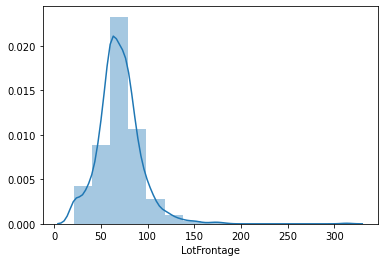

In [252]:
sns.distplot(df['LotFrontage'][df['LotFrontage'].notna()], bins = 15)

In [253]:
df[df['GarageYrBlt'].isna()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remod_gap
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,None,None,None,None,0,None,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,None,None,NaN,None,0,0,None,None,N,0,0,0,0,0,0,None,None,None,0,6,2008,WD,AdjLand,82000,0
48,190,RM,33.0,4456,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,None,None,NaN,None,0,0,None,None,N,0,0,102,0,0,0,None,None,None,0,6,2009,New,Partial,113000,88
78,90,RL,72.0,10778,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,None,None,NaN,None,0,0,None,None,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,136500,0
88,50,C (all),105.0,8470,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,None,None,NaN,None,0,0,None,None,N,0,0,156,0,0,0,None,MnPrv,None,0,10,2009,ConLD,Abnorml,85000,67
89,20,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,None,None,NaN,None,0,0,None,None,Y,0,0,0,0,0,0,None,None,None,0,8,2007,WD,Normal,123600,1


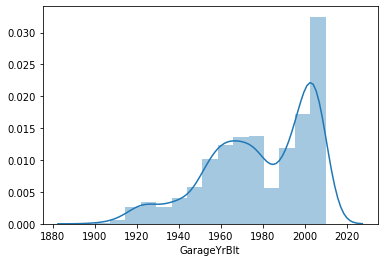

In [254]:
sns.distplot(df['GarageYrBlt'][df['GarageYrBlt'].notna()])

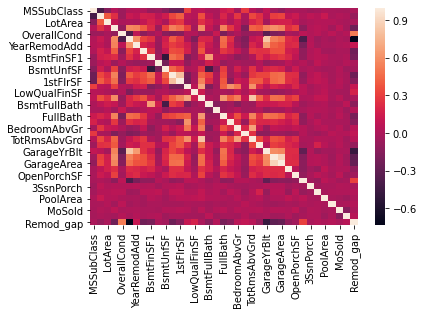

In [255]:
num_df = df[num_cols]
sns.heatmap(num_df.corr())

In [256]:
lot_df = df[df['LotFrontage'].notna()]
lot_corr_cols = []
print("Correlation w.r.t LotFrontage")
for col in num_cols:
    if col != 'LotFrontage' and col != 'GarageYrBlt' and col != 'MasVnrArea':
        print("LotFrontage vs {} : {}".format(col, pearsonr(lot_df['LotFrontage'].values, lot_df[col].values)[0]))
        lot_corr_cols.append((pearsonr(lot_df['LotFrontage'].values, lot_df[col].values)[0], col))

Correlation w.r.t LotFrontage
LotFrontage vs MSSubClass : -0.405345362348339
LotFrontage vs LotArea : 0.39522109952646745
LotFrontage vs OverallQual : 0.24070200780209233
LotFrontage vs OverallCond : -0.05698818773840393
LotFrontage vs YearBuilt : 0.11945713515638193
LotFrontage vs YearRemodAdd : 0.0852462839980579
LotFrontage vs BsmtFinSF1 : 0.15524950672778656
LotFrontage vs BsmtFinSF2 : 0.05423701039867368
LotFrontage vs BsmtUnfSF : 0.1414277674326464
LotFrontage vs TotalBsmtSF : 0.33002524443247055
LotFrontage vs 1stFlrSF : 0.4137648081676594
LotFrontage vs 2ndFlrSF : 0.06986779218214074
LotFrontage vs LowQualFinSF : 0.04150567812566999
LotFrontage vs GrLivArea : 0.3618210411581563
LotFrontage vs BsmtFullBath : 0.07943555946958447
LotFrontage vs BsmtHalfBath : -0.005227270188879379
LotFrontage vs FullBath : 0.20018483939179865
LotFrontage vs HalfBath : 0.045312810849316106
LotFrontage vs BedroomAbvGr : 0.27263038225002395
LotFrontage vs KitchenAbvGr : -0.008048168556522566
LotFront

In [257]:
sorted(lot_corr_cols, reverse = True)[:6]

[(0.4137648081676594, '1stFlrSF'),
 (0.39522109952646745, 'LotArea'),
 (0.3618210411581563, 'GrLivArea'),
 (0.33970841091438425, 'TotRmsAbvGrd'),
 (0.33002524443247055, 'TotalBsmtSF'),
 (0.32625315506257524, 'GarageArea')]

In [258]:
lot_corr_cols = [x[1] for x in sorted(lot_corr_cols, reverse = True)[:6]]

In [259]:
lot_corr_cols.append('LotFrontage')

In [260]:
random.shuffle(lot_corr_cols)
lot_corr_cols

['1stFlrSF',
 'LotFrontage',
 'GarageArea',
 'LotArea',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'GrLivArea']

In [261]:
# lot_corr_cols.remove('LotFrontage')
temp_df = df[lot_corr_cols]
temp_df.shape

(1454, 7)

In [262]:
knn = KNNImputer(n_neighbors = 6, add_indicator = True)
temp = knn.fit_transform(temp_df)
temp.shape

(1454, 8)

In [263]:
df['LotFrontage'] = temp[:, 2].T
df['LotFrontage'].isna().sum()

0

In [264]:
len(df['LotFrontage'])

1454

In [265]:
gyb_df = df[df['GarageYrBlt'].notna()]
gyb_corr_cols = []
print("Correlation w.r.t GarageYrBlt")
for col in num_cols:
    if col != 'GarageYrBlt' and col != 'MasVnrArea':
        print("GarageYrBlt vs {} : {}".format(col, pearsonr(gyb_df['GarageYrBlt'].values, gyb_df[col].values)[0]))
        gyb_corr_cols.append((pearsonr(gyb_df['GarageYrBlt'].values, gyb_df[col].values)[0], col))

Correlation w.r.t GarageYrBlt
GarageYrBlt vs MSSubClass : 0.08619124201074298
GarageYrBlt vs LotFrontage : 0.5651560512041574
GarageYrBlt vs LotArea : -0.02756075257003249
GarageYrBlt vs OverallQual : 0.5471773901881067
GarageYrBlt vs OverallCond : -0.3240942995655491
GarageYrBlt vs YearBuilt : 0.825228950585058
GarageYrBlt vs YearRemodAdd : 0.6422776058699169
GarageYrBlt vs BsmtFinSF1 : 0.14926882398155195
GarageYrBlt vs BsmtFinSF2 : -0.08494542978869318
GarageYrBlt vs BsmtUnfSF : 0.19100554393221908
GarageYrBlt vs TotalBsmtSF : 0.3286722250982052
GarageYrBlt vs 1stFlrSF : 0.23173689814981485
GarageYrBlt vs 2ndFlrSF : 0.07124882525131912
GarageYrBlt vs LowQualFinSF : -0.03646094427688541
GarageYrBlt vs GrLivArea : 0.2304763184952099
GarageYrBlt vs BsmtFullBath : 0.12231444650960682
GarageYrBlt vs BsmtHalfBath : -0.0776875010442666
GarageYrBlt vs FullBath : 0.48577830868910643
GarageYrBlt vs HalfBath : 0.19563332418247376
GarageYrBlt vs BedroomAbvGr : -0.06543795323425221
GarageYrBlt v

In [266]:
sorted(gyb_corr_cols, reverse = True)[:5]

[(0.825228950585058, 'YearBuilt'),
 (0.6422776058699169, 'YearRemodAdd'),
 (0.5895930974849684, 'GarageCars'),
 (0.5651560512041574, 'LotFrontage'),
 (0.5651560512041574, 'GarageArea')]

In [267]:
gyb_corr_cols = [x[1] for x in sorted(gyb_corr_cols, reverse = True)[:5]]

In [268]:
gyb_corr_cols.append('GarageYrBlt')

In [269]:
random.shuffle(gyb_corr_cols)
gyb_corr_cols

['YearBuilt',
 'GarageCars',
 'GarageArea',
 'YearRemodAdd',
 'LotFrontage',
 'GarageYrBlt']

In [270]:
temp_df = df[gyb_corr_cols]
temp_df.shape

(1454, 6)

In [271]:
knn = KNNImputer(n_neighbors = 5, add_indicator = True)
temp = knn.fit_transform(temp_df)
temp.shape

(1454, 7)

In [272]:
df['GarageYrBlt'] = temp[:, 2].T
df['GarageYrBlt'].isna().sum()

0

In [273]:
mva_df = df[df['MasVnrArea'].notna()]
mva_corr_cols = []
print("Correlation w.r.t MasVnrArea")
for col in num_cols:
    if col != 'MasVnrArea':
        print("MasVnrArea vs {} : {}".format(col, pearsonr(mva_df['MasVnrArea'].values, mva_df[col].values)[0]))
        mva_corr_cols.append((pearsonr(mva_df['MasVnrArea'].values, mva_df[col].values)[0], col))

Correlation w.r.t MasVnrArea
MasVnrArea vs MSSubClass : 0.021854315239086423
MasVnrArea vs LotFrontage : 0.3668618322198137
MasVnrArea vs LotArea : 0.09319326206793738
MasVnrArea vs OverallQual : 0.4099371022308551
MasVnrArea vs OverallCond : -0.1262003800337786
MasVnrArea vs YearBuilt : 0.3158103781762811
MasVnrArea vs YearRemodAdd : 0.18112126467576084
MasVnrArea vs BsmtFinSF1 : 0.24826067676070604
MasVnrArea vs BsmtFinSF2 : -0.07105259895180974
MasVnrArea vs BsmtUnfSF : 0.11512949118739525
MasVnrArea vs TotalBsmtSF : 0.3528413724817793
MasVnrArea vs 1stFlrSF : 0.3331618480820667
MasVnrArea vs 2ndFlrSF : 0.16935569512240864
MasVnrArea vs LowQualFinSF : -0.06907721898264303
MasVnrArea vs GrLivArea : 0.37932363520427814
MasVnrArea vs BsmtFullBath : 0.07972064429249738
MasVnrArea vs BsmtHalfBath : 0.027969014439211078
MasVnrArea vs FullBath : 0.27447849375558975
MasVnrArea vs HalfBath : 0.20089205872951713
MasVnrArea vs BedroomAbvGr : 0.09901925137704848
MasVnrArea vs KitchenAbvGr : -0.

In [274]:
sorted(mva_corr_cols, reverse = True)[:5]

[(0.4099371022308551, 'OverallQual'),
 (0.37932363520427814, 'GrLivArea'),
 (0.3668618322198137, 'LotFrontage'),
 (0.3668618322198137, 'GarageYrBlt'),
 (0.3668618322198137, 'GarageArea')]

In [275]:
mva_corr_cols = [x[1] for x in sorted(mva_corr_cols, reverse = True)[:5]]

In [276]:
mva_corr_cols.append('MasVnrArea')

In [277]:
random.shuffle(mva_corr_cols)
mva_corr_cols

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'GrLivArea',
 'GarageArea',
 'OverallQual']

In [278]:
temp_df = df[mva_corr_cols]
temp_df.shape

(1454, 6)

In [279]:
knn = KNNImputer(n_neighbors = 5, add_indicator = True)
temp = knn.fit_transform(temp_df)
temp.shape

(1454, 7)

In [280]:
df['MasVnrArea'] = temp[:, 3].T
df['MasVnrArea'].isna().sum()

0

In [282]:
def knn_mcf(df, target, miss_cols, neighbors = 5, method = 'pearsonr'):
    correlate = pearsonr
    if method == 'spearmanr':
        correlate = spearmanr
    tdf = df[df[target].notna()]
    corr_cols = []
    print("Correlation w.r.t {}".format(target))
    for col in num_cols:
        if col not in miss_cols:
            print("{} vs {} : {}".format(target, col, correlate(tdf[target].values, tdf[col].values)[0]))
            corr_cols.append((correlate(tdf[target].values, tdf[col].values)[0], col))
            print(sorted(corr_cols, reverse = True)[:n_neighbors])
            final_corr_cols = [x[1] for x in sorted(corr_cols, reverse = True)[:n_neighbors]]
            final_corr_cols.append(target)
            random.shuffle(final_corr_cols)
            temp_df = df.loc[:, final_corr_cols]
            knn = KNNImputer(n_neighbors = neighbors)
            temp = knn.fit_transform(temp_df)
            df[target] = temp[:, final_corr_cols.index(target)].T
            miss_cols.drop(target)
            return df, miss_cols 

In [283]:
for col in df.columns:
    print("{} : {}".format(col, df[col].isna().sum()))

MSSubClass : 0
MSZoning : 0
LotFrontage : 0
LotArea : 0
Street : 0
Alley : 0
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 0
MasVnrArea : 0
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 0
BsmtCond : 0
BsmtExposure : 0
BsmtFinType1 : 0
BsmtFinSF1 : 0
BsmtFinType2 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 0
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 0
GarageType : 0
GarageYrBlt : 0
GarageFinish : 0
GarageCars : 0
GarageArea : 0
GarageQual : 0
GarageCond : 0
PavedDrive : 0
WoodDeckSF : 0
OpenPorchSF : 0
Enclo

In [284]:
y = df['SalePrice'].values
drop_cols.append('SalePrice')

In [285]:
y.size

1454

In [286]:
drop_cols

['Street_Grvl', 'Utilities_NoSeWa', 'CentralAir_N', 'SalePrice']

In [287]:
df = pd.get_dummies(df, columns = ohe)

In [288]:
df = df.replace(replace_dict)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LandContour,BldgType,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Remod_gap,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exter

In [289]:
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size = 0.225, random_state = 42)

In [290]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor()

In [291]:
y_pred = xgb.predict(X_val)
math.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred)))

0.0062268855770299366

In [292]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [293]:
y_pred = rfr.predict(X_val)
math.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred)))

0.009880506961864622

In [294]:
log_df = df.copy()
log_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LandContour,BldgType,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Remod_gap,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exter

In [295]:
sc = MinMaxScaler()
data = sc.fit_transform(log_df)

In [296]:
data.shape

(1454, 320)

In [297]:
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size = 0.225, random_state = 42)

In [298]:
tsc = MinMaxScaler()
y_train_scaled = tsc.fit_transform(y_train.reshape(-1, 1))

In [299]:
lr = LinearRegression()
lr.fit(X_train, y_train_scaled)

LinearRegression()

In [300]:
# xgb = XGBRegressor()
# xgb.fit(X_train, y_train_scaled)

In [301]:
y_pred = lr.predict(X_val)
# y_pred = xgb.predict(X_val)
sp = tsc.inverse_transform(y_pred.reshape(-1, 1))
sp

array([[120000.        ],
       [180500.        ],
       [115000.        ],
       [746199.92036235],
       [315500.        ],
       [183200.        ],
       [167240.        ],
       [186700.        ],
       [165000.        ],
       [268000.        ],
       [119500.        ],
       [313000.        ],
       [213500.        ],
       [316600.        ],
       [157900.        ],
       [ 84000.        ],
       [228000.        ],
       [139600.        ],
       [222000.        ],
       [226000.        ],
       [155000.        ],
       [210000.        ],
       [103600.        ],
       [350000.        ],
       [130000.        ],
       [181000.        ],
       [181134.        ],
       [192000.        ],
       [144500.        ],
       [423000.        ],
       [472301.00857062],
       [451950.        ],
       [145000.        ],
       [135750.        ],
       [129000.        ],
       [148500.        ],
       [207500.        ],
       [104468.86251627],
       [2480

In [302]:
y_val

array([120000, 180500, 115000, 745000, 315500, 183200, 167240, 186700,
       165000, 268000, 119500, 313000, 213500, 316600, 157900,  84000,
       228000, 139600, 222000, 226000, 155000, 210000, 103600, 350000,
       130000, 181000, 181134, 192000, 144500, 423000, 475000, 451950,
       145000, 135750, 129000, 148500, 207500, 106000, 248000, 176000,
       114500, 241500, 167900,  75000, 143000, 240000, 314813, 127000,
       162000, 189000, 169900, 119000, 142500, 124000, 176485, 166000,
       133500, 175000, 114500, 126000,  68500, 131000, 317000, 117000,
       283463, 211000, 250000, 240000, 120500, 176000, 159500,  88000,
       109008, 123000, 178000, 285000, 129000, 165150, 141000, 124900,
       123000, 133000, 113000, 240000, 156000, 369900, 290000,  95000,
       320000, 177000, 100000, 137000, 201000, 242000, 136500, 136500,
       141000, 160000, 200000, 260000,  85400, 151400, 244000, 132000,
       175500, 124000, 109900, 230000, 215200, 133900,  93000, 104900,
      

In [303]:
math.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(sp)))

0.0029857143283401554

In [ ]:
# ridge = Ridge()
# ridge.fit(X_train, y_train)

In [ ]:
# y_pred = ridge.predict(X_val)
# math.sqrt(mean_squared_error(y_val, y_pred))